# 利用 TF-idf 、 LDA 、LSA 进行 特征 提取

## 加载库

In [18]:
import os
from gensim import corpora, models, similarities
from pprint import pprint
from matplotlib import pyplot as plt
import logging
from gensim import corpora
from collections import defaultdict
import numpy as np 

## 数据预处理

In [163]:
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

# 去掉停用词
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]
texts

[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'],
 ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'management', 'system'],
 ['system', 'human', 'system', 'engineering', 'testing', 'eps'],
 ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'],
 ['generation', 'random', 'binary', 'unordered', 'trees'],
 ['intersection', 'graph', 'paths', 'trees'],
 ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'],
 ['graph', 'minors', 'survey']]

In [ ]:
# 去掉只出现低于 n 次的单词
n = 0
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
texts = [[token for token in text if frequency[token] > n]
         for text in texts]

dictionary = corpora.Dictionary(texts)   # 生成词典

# 将文档存入字典，字典有很多功能，比如
# diction.token2id 存放的是单词-id key-value对
# diction.dfs 存放的是单词的出现频率
dictionary.save('output/deerwester.dict')  # store the dictionary, for future reference
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('output/deerwester.mm', corpus)  # store to disk, for later use

注意最后的corpora.MmCorpus.serialize 将corpus持久化到磁盘中。相反，可以用以下命令来从磁盘中读取corpus。

除了MmCorpus以外，还有其他的格式，例如SvmLightCorpus, BleiCorpus, LowCorpus等等，用法类似。

In [3]:
corpus = corpora.MmCorpus('output/deerwester.mm')

In [72]:
nodes = list(corpus)
nodes

[[(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0)],
 [(2, 1.0), (7, 1.0), (8, 1.0), (9, 1.0), (10, 1.0), (11, 1.0), (12, 1.0)],
 [(4, 1.0), (10, 1.0), (12, 1.0), (13, 1.0), (14, 1.0)],
 [(3, 1.0), (10, 2.0), (13, 1.0), (15, 1.0), (16, 1.0)],
 [(8, 1.0), (11, 1.0), (12, 1.0), (17, 1.0), (18, 1.0), (19, 1.0), (20, 1.0)],
 [(21, 1.0), (22, 1.0), (23, 1.0), (24, 1.0), (25, 1.0)],
 [(24, 1.0), (26, 1.0), (27, 1.0), (28, 1.0)],
 [(24, 1.0),
  (26, 1.0),
  (29, 1.0),
  (30, 1.0),
  (31, 1.0),
  (32, 1.0),
  (33, 1.0),
  (34, 1.0)],
 [(9, 1.0), (26, 1.0), (30, 1.0)]]

## 编写函数

In [4]:
def PrintDictionary(dictionary):
    token2id = dictionary.token2id
    dfs = dictionary.dfs
    token_info = {}
    for word in token2id:
        token_info[word] = dict(
            word = word,
            id = token2id[word],
            freq = dfs[token2id[word]]
        )
    token_items = token_info.values()
    token_items = sorted(token_items, key = lambda x:x['id'])
    print('The info of dictionary: ')
    pprint(token_items)
    print('--------------------------')

def Show2dCorpora(corpus):
    nodes = list(corpus)
    ax0 = [x[0][1] for x in nodes] # 绘制各个doc代表的点
    ax1 = [x[1][1] for x in nodes]
    # print(ax0)
    # print(ax1)
    plt.plot(ax0,ax1,'o')
    plt.show()

## 数据加载

In [5]:
if (os.path.exists("output/deerwester.dict")):
    dictionary = corpora.Dictionary.load('output/deerwester.dict')
    corpus = corpora.MmCorpus('output/deerwester.mm')
    print("Used files generated from first tutorial")
else:
    print("Please run first tutorial to generate data set")

PrintDictionary(dictionary)

Used files generated from first tutorial
The info of dictionary: 
[{'freq': 1, 'id': 0, 'word': 'abc'},
 {'freq': 1, 'id': 1, 'word': 'applications'},
 {'freq': 2, 'id': 2, 'word': 'computer'},
 {'freq': 2, 'id': 3, 'word': 'human'},
 {'freq': 2, 'id': 4, 'word': 'interface'},
 {'freq': 1, 'id': 5, 'word': 'lab'},
 {'freq': 1, 'id': 6, 'word': 'machine'},
 {'freq': 1, 'id': 7, 'word': 'opinion'},
 {'freq': 2, 'id': 8, 'word': 'response'},
 {'freq': 2, 'id': 9, 'word': 'survey'},
 {'freq': 3, 'id': 10, 'word': 'system'},
 {'freq': 2, 'id': 11, 'word': 'time'},
 {'freq': 3, 'id': 12, 'word': 'user'},
 {'freq': 2, 'id': 13, 'word': 'eps'},
 {'freq': 1, 'id': 14, 'word': 'management'},
 {'freq': 1, 'id': 15, 'word': 'engineering'},
 {'freq': 1, 'id': 16, 'word': 'testing'},
 {'freq': 1, 'id': 17, 'word': 'error'},
 {'freq': 1, 'id': 18, 'word': 'measurement'},
 {'freq': 1, 'id': 19, 'word': 'perceived'},
 {'freq': 1, 'id': 20, 'word': 'relation'},
 {'freq': 1, 'id': 21, 'word': 'binary'},


## TF-idf

In [6]:
# 尝试将corpus(bow形式) 转化成tf-idf形式
tfidf_model = models.TfidfModel(corpus) # step 1 -- initialize a model 将文档由按照词频表示 转变为按照tf-idf格式表示

In [7]:
# 将整个corpus转为tf-idf格式
corpus_tfidf = tfidf_model[corpus]
pprint(list(corpus_tfidf))
pprint(list(corpus))

[[(0, 0.4301019571350565),
  (1, 0.4301019571350565),
  (2, 0.2944198962221451),
  (3, 0.2944198962221451),
  (4, 0.2944198962221451),
  (5, 0.4301019571350565),
  (6, 0.4301019571350565)],
 [(2, 0.3726494271826947),
  (7, 0.5443832091958983),
  (8, 0.3726494271826947),
  (9, 0.3726494271826947),
  (10, 0.27219160459794917),
  (11, 0.3726494271826947),
  (12, 0.27219160459794917)],
 [(4, 0.438482464916089),
  (10, 0.32027755044706185),
  (12, 0.32027755044706185),
  (13, 0.438482464916089),
  (14, 0.6405551008941237)],
 [(3, 0.3449874408519962),
  (10, 0.5039733231394895),
  (13, 0.3449874408519962),
  (15, 0.5039733231394895),
  (16, 0.5039733231394895)],
 [(8, 0.30055933182961736),
  (11, 0.30055933182961736),
  (12, 0.21953536176370683),
  (17, 0.43907072352741366),
  (18, 0.43907072352741366),
  (19, 0.43907072352741366),
  (20, 0.43907072352741366)],
 [(21, 0.48507125007266594),
  (22, 0.48507125007266594),
  (23, 0.48507125007266594),
  (24, 0.24253562503633297),
  (25, 0.4850712

## LSI 训练

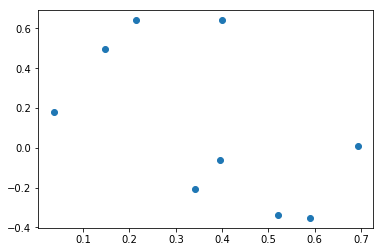

In [139]:
# 转化为lsi模型, 可用作聚类或分类
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=5)
corpus_lsi = lsi_model[corpus_tfidf]
Show2dCorpora(corpus_lsi)

In [140]:
nodes = list(corpus_lsi)
pprint(nodes)
lsi_model.print_topics(2) # 打印各topic的含义

[[(0, 0.3405711798684182),
  (1, -0.20602251622679726),
  (2, 0.2516322932612175),
  (3, -0.06646636031660524),
  (4, 0.8634175502633796)],
 [(0, 0.6933040002171557),
  (1, 0.007232758390387371),
  (2, -0.42828031011610496),
  (3, 0.009221456247179474),
  (4, 0.07245540476224699)],
 [(0, 0.5902607670389719),
  (1, -0.35260469490855795),
  (2, 0.3088320925810749),
  (3, 0.015857166285257046),
  (4, -0.24165669441507717)],
 [(0, 0.521490182182513),
  (1, -0.33887976154055394),
  (2, 0.4328304015902546),
  (3, -0.03897722688934288),
  (4, -0.3336151409993161)],
 [(0, 0.395331931763544),
  (1, -0.059192853366600864),
  (2, -0.6817088379096496),
  (3, 0.27555804027904607),
  (4, -0.053930814779541224)],
 [(0, 0.036353173528494515),
  (1, 0.18146550208819),
  (2, 0.20409484571950462),
  (3, 0.868444761172718),
  (4, 0.08100886500516286)],
 [(0, 0.14709012328779061),
  (1, 0.494329481278223),
  (2, 0.25207415523993637),
  (3, 0.2575886501115412),
  (4, -0.04099410336036502)],
 [(0, 0.21407117

[(0,
  '0.400*"system" + 0.318*"survey" + 0.290*"user" + 0.274*"eps" + 0.236*"management" + 0.236*"opinion" + 0.235*"time" + 0.235*"response" + 0.224*"interface" + 0.224*"computer"'),
 (1,
  '0.421*"minors" + 0.420*"graph" + 0.293*"survey" + 0.239*"trees" + 0.226*"intersection" + 0.226*"paths" + -0.204*"system" + -0.196*"eps" + 0.189*"quasi" + 0.189*"iv"')]

In [136]:
lsi_model.save('output/model.lsi') # same for tfidf, lda, ...
lsi_model = models.LsiModel.load('output/model.lsi')

## LDA 模型

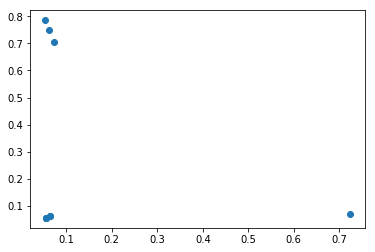

In [141]:
lda_model = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=5)
corpus_lda = lda_model[corpus_tfidf]
Show2dCorpora(corpus_lda)

In [143]:
nodes = list(corpus_lda)
pprint(nodes)
lda_model.print_topics(2) # 打印各topic的含义

[[(0, 0.055555355),
  (1, 0.05577199),
  (2, 0.055571437),
  (3, 0.05554118),
  (4, 0.77756)],
 [(0, 0.055928905),
  (1, 0.05658192),
  (2, 0.055944256),
  (3, 0.05637846),
  (4, 0.77516645)],
 [(0, 0.06337499),
  (1, 0.063884094),
  (2, 0.06338804),
  (3, 0.06343938),
  (4, 0.7459135)],
 [(0, 0.062526),
  (1, 0.74873877),
  (2, 0.06254443),
  (3, 0.06251015),
  (4, 0.063680656)],
 [(0, 0.055974975),
  (1, 0.055953037),
  (2, 0.055992078),
  (3, 0.7751799),
  (4, 0.05690002)],
 [(0, 0.06330396),
  (1, 0.06300176),
  (2, 0.06290872),
  (3, 0.74791425),
  (4, 0.06287134)],
 [(0, 0.72279567),
  (1, 0.06984144),
  (2, 0.06908332),
  (3, 0.069224946),
  (4, 0.06905461)],
 [(0, 0.054009907),
  (1, 0.7850806),
  (2, 0.053606093),
  (3, 0.05373627),
  (4, 0.053567104)],
 [(0, 0.07400992),
  (1, 0.7045425),
  (2, 0.07370488),
  (3, 0.07368365),
  (4, 0.07405905)]]


[(1,
  '0.081*"minors" + 0.063*"graph" + 0.060*"survey" + 0.051*"system" + 0.051*"testing" + 0.051*"engineering" + 0.045*"quasi" + 0.044*"ordering" + 0.044*"well" + 0.044*"iv"'),
 (4,
  '0.065*"interface" + 0.060*"computer" + 0.058*"management" + 0.055*"user" + 0.055*"system" + 0.052*"opinion" + 0.044*"eps" + 0.044*"lab" + 0.044*"applications" + 0.044*"abc"')]

In [144]:
lda_model.save('output/model.lda') # same for tfidf, lda, ...
lda_model = models.LdaModel.load('output/model.lda')

## TF-idf 和 LSI or LDA 的合并

- 要从gensim创建文档术语矩阵，可以使用matutils.corpus2csv
- csc_matrix() : 转换为稀疏/密集矩阵;


In [47]:
from scipy.sparse import csc_matrix
from gensim import matutils

### TF-idf 格式转化

In [148]:
tfidf_scipy_csc_matrix =matutils.corpus2csc(corpus_tfidf)
tfidf_matrix=csc_matrix(tfidf_scipy_csc_matrix).toarray().T     

In [149]:
tfidf_matrix.shape

(9, 35)

### LSI 格式转化

In [150]:
lsi_scipy_csc_matrix =matutils.corpus2csc(corpus_lsi)
lsi_matrix=csc_matrix(lsi_scipy_csc_matrix).toarray().T

In [151]:
lsi_matrix.shape

(9, 5)

### LDA 格式 转化

In [152]:
lda_scipy_csc_matrix =matutils.corpus2csc(corpus_lda)
lda_matrix=csc_matrix(lda_scipy_csc_matrix).toarray().T

In [153]:
lda_matrix.shape

(9, 5)

### 合并

#### TF-idf 和 LSI 合并

In [154]:
tfidf_lsi_matrix = np.concatenate((tfidf_matrix,lsi_matrix),axis=1)
tfidf_lsi_matrix.shape

(9, 40)

#### TF-idf 和 LDA 合并

In [157]:
tfidf_lda_matrix = np.concatenate((tfidf_matrix,lda_matrix),axis=1)
tfidf_lda_matrix.shape

(9, 40)

#### TF-idf LSA 和 LDA 合并

In [158]:
tfidf_lsi_lda_matrix = np.concatenate((tfidf_matrix,lsi_matrix,lda_matrix),axis=1)
tfidf_lsi_lda_matrix.shape

(9, 45)

## 相似度计算

这一部分主要负责计算文档间的相似度。与向量的相似度计算方式一样，采用余弦方法计算得到。一般来讲，使用lsi模型得到的向量进行计算效果比较好。

```
    documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]
```

### 预操作

In [159]:
test_text = "Human machine interface for lab abc computer applications".lower().split()
test_bow = dictionary.doc2bow(test_text)

In [160]:
test_tfidf = tfidf_model[test_bow]
print(test_tfidf)

[(0, 0.4301019571350565), (1, 0.4301019571350565), (2, 0.2944198962221451), (3, 0.2944198962221451), (4, 0.2944198962221451), (5, 0.4301019571350565), (6, 0.4301019571350565)]


### 合并处理

In [161]:
model_list = [tfidf_model,lsi_model,lda_model]
model_name = ['tfidf','lsi','lda']
corpus_list = [corpus_tfidf,corpus_lsi,corpus_lda]
test_res_dict = {}
for i in range(len(model_name)):
    test = model_list[i][test_bow]
    test_corpus_simi_matrix = similarities.MatrixSimilarity(corpus_list[i])
    test_simi = test_corpus_simi_matrix[test]
    test_res_dict[model_name[i]] = list(enumerate(test_simi))
    print(f"{model_name[i]}:{test_res_dict[model_name[i]]}")


tfidf:[(0, 1.0), (1, 0.1097154), (2, 0.12909795), (3, 0.101571165), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0)]
lsi:[(0, 0.998849), (1, 0.2594146), (2, 0.22752088), (3, 0.13108018), (4, -0.09498772), (5, 0.040945835), (6, -0.064940125), (7, -0.04621652), (8, 0.0376087)]
lda:[(0, 0.996266), (1, 0.9960959), (2, 0.993614), (3, 0.11813167), (4, 0.10596235), (5, 0.11707874), (6, 0.12881944), (7, 0.10078776), (8, 0.13856158)]


### 分模块处理

#### TF-idf 计算相似度

In [126]:
test_tfidf_corpus_simi_matrix = similarities.MatrixSimilarity(corpus_tfidf)
test_tfidf_simi = test_tfidf_corpus_simi_matrix[test_tfidf]
test_tfidf_simi_list = list(enumerate(test_tfidf_simi))

#### LSI 计算相似度

In [127]:
test_lsi = lsi_model[test_bow]
test_lsi_corpus_simi_matrix = similarities.MatrixSimilarity(corpus_lsi)
test_lsi_simi = test_lsi_corpus_simi_matrix[test_lsi]
test_lsi_simi_list = list(enumerate(test_lsi_simi))

#### LDA 计算相似度

In [128]:
test_lda = lda_model[test_bow]
test_lda_corpus_simi_matrix = similarities.MatrixSimilarity(corpus_lda)
test_lda_simi = test_lda_corpus_simi_matrix[test_lda]
test_lda_simi_list = list(enumerate(test_lda_simi))

#### 比较 三个方法 的 相似度性能

In [123]:
print(f"tfidf:{test_tfidf_simi_list}")
print(f"lsi:{test_lsi_simi_list}")
print(f"lda:{test_lda_simi_list}")

tfidf:[(0, 0.0), (1, 0.19246854), (2, 0.22647041), (3, 0.35636294), (4, 0.0), (5, 0.0), (6, 0.2236068), (7, 0.14471687), (8, 0.32448703)]
lsi:[(0, 0.61618114), (1, 0.93853277), (2, 0.6205461), (3, 0.5904914), (4, 0.8720119), (5, 0.53168356), (6, 0.60684514), (7, 0.63295007), (8, 0.7963887)]
lda:[(0, 0.5401466), (1, 0.99867314), (2, 0.62583184), (3, 0.7585788), (4, 0.9980239), (5, 0.5421643), (6, 0.9514648), (7, 0.98816395), (8, 0.99786574)]


## 参考资料

1. [gensim使用方法以及例子](https://blog.csdn.net/u014595019/article/details/52218249)
2. [gensim测试文本相似度](https://www.jianshu.com/p/a8513c7b4b82)